In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
!pip install xgboost
import xgboost as xgb


In [2]:
def readData(location):
  if(location == 1):
    y_train_obs_A = pd.read_parquet('data/A/train_targets.parquet')
    X_test_est_A = pd.read_parquet('data/A/X_test_estimated.parquet')
    X_train_est_A = pd.read_parquet('data/A/X_train_estimated.parquet')
    X_train_obs_A = pd.read_parquet('data/A/X_train_observed.parquet')
    return y_train_obs_A, X_test_est_A, X_train_est_A, X_train_obs_A
  elif(location == 2):
    y_train_obs_B = pd.read_parquet('data/B/train_targets.parquet')
    X_test_est_B = pd.read_parquet('data/B/X_test_estimated.parquet' )
    X_train_est_B = pd.read_parquet('data/B/X_train_estimated.parquet')
    X_train_obs_B = pd.read_parquet('data/B/X_train_observed.parquet')
    return y_train_obs_B, X_test_est_B , X_train_est_B, X_train_obs_B
  else:
    y_train_obs_C = pd.read_parquet('data/C/train_targets.parquet')
    X_test_est_C = pd.read_parquet('data/C/X_test_estimated.parquet')
    X_train_est_C = pd.read_parquet('data/C/X_train_estimated.parquet')
    X_train_obs_C = pd.read_parquet('data/C/X_train_observed.parquet')
    X_c = pd.concat([X_train_est_C, X_train_obs_C])
    return y_train_obs_C, X_test_est_C, X_train_est_C, X_train_obs_C


In [6]:
y_a, X_test_A, X_train_A_est, X_train_A_obs = readData(1)

y_b, X_test_B, X_train_B_est, X_train_B_obs = readData(2)
y_c, X_test_C, X_train_C_est, X_train_C_obs = readData(3)
X_test_est_A = pd.read_parquet('data/C/X_test_estimated.parquet')
X_test_est_A.shape

(2880, 47)

In [7]:
columns_with_nan_A_obs = X_train_A_obs.columns[X_train_A_obs.isna().any()].to_list()
X_train_A_obs.drop(columns=columns_with_nan_A_obs, inplace=True)

columns_with_nan_A_test_est = X_test_A.columns[X_test_A.isna().any()].to_list()
X_test_A.drop(columns=columns_with_nan_A_test_est, inplace=True)

columns_with_nan_A_train_est = X_train_A_est.columns[X_train_A_est.isna().any()].to_list()
X_train_A_est.drop(columns=columns_with_nan_A_train_est, inplace=True)

y_a = y_a.dropna()
X_test_A.shape

(2880, 44)

In [8]:
columns_with_nan_B_obs = X_train_B_obs.columns[X_train_B_obs.isna().any()].to_list()
X_train_B_obs.drop(columns=columns_with_nan_B_obs, inplace=True)

columns_with_nan_B_test_est = X_test_B.columns[X_test_B.isna().any()].to_list()
X_test_B.drop(columns=columns_with_nan_B_test_est, inplace=True)

columns_with_nan_B_train_est = X_train_B_est.columns[X_train_B_est.isna().any()].to_list()
X_train_B_est.drop(columns=columns_with_nan_B_train_est, inplace=True)

y_b = y_b.dropna()
X_test_B.shape

(2880, 44)

In [9]:
columns_with_nan_C_obs = X_train_C_obs.columns[X_train_C_obs.isna().any()].to_list()
X_train_C_obs.drop(columns=columns_with_nan_C_obs, inplace=True)

columns_with_nan_C_test_est = X_test_C.columns[X_test_C.isna().any()].to_list()
X_test_C.drop(columns=columns_with_nan_C_test_est, inplace=True)

columns_with_nan_C_train_est = X_train_C_est.columns[X_train_C_est.isna().any()].to_list()
X_train_C_est.drop(columns=columns_with_nan_C_train_est, inplace=True)

y_c = y_c.dropna()
X_test_C.shape

(2880, 44)

In [12]:
X_train_A_obs.set_index('date_forecast', inplace=True)

X_train_A_est.set_index('date_forecast', inplace=True)

X_test_A.set_index('date_forecast', inplace=True)

y_a.set_index('time', inplace=True)


In [13]:
X_train_B_obs.set_index('date_forecast', inplace=True)

X_train_B_est.set_index('date_forecast', inplace=True)

X_test_B.set_index('date_forecast', inplace=True)

y_b.set_index('time', inplace=True)

In [14]:
X_train_C_obs.set_index('date_forecast', inplace=True)

X_train_C_est.set_index('date_forecast', inplace=True)

X_test_C.set_index('date_forecast', inplace=True)

y_c.set_index('time', inplace=True)

In [15]:
def make_hourly(unsampled_df, target_df):
    sampled_df = unsampled_df.resample('H').mean()
    sampled_df.index = sampled_df.index.floor('H')
    merged_df = sampled_df.merge(target_df, left_index=True, right_index=True, how='inner')
    return merged_df

In [16]:
merged_df_train_obs_A = make_hourly(X_train_A_obs, y_a)
merged_df_train_est_A = make_hourly(X_train_A_est, y_a)
print(merged_df_train_obs_A.shape)
merged_df_train_est_A = merged_df_train_est_A.dropna()
merged_df_train_obs_A = merged_df_train_obs_A.dropna()
print(merged_df_train_obs_A.shape)


(29667, 43)
(29667, 43)


C:\Users\claxl\AppData\Local\Temp\ipykernel_18000\3041205111.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sampled_df = unsampled_df.resample('H').mean()


In [17]:
merged_df_train_obs_B = make_hourly(X_train_B_obs, y_b)
merged_df_train_est_B = make_hourly(X_train_B_est, y_b)
print(merged_df_train_obs_B.shape)
merged_df_train_est_B = merged_df_train_est_B.dropna()
merged_df_train_obs_B = merged_df_train_obs_B.dropna()
print(merged_df_train_obs_B.shape)

(29218, 43)
(29218, 43)


C:\Users\claxl\AppData\Local\Temp\ipykernel_18000\3041205111.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sampled_df = unsampled_df.resample('H').mean()


In [18]:
merged_df_train_obs_C = make_hourly(X_train_C_obs, y_c)
merged_df_train_est_C = make_hourly(X_train_C_est, y_c)
print(merged_df_train_obs_C.shape)
merged_df_train_est_C = merged_df_train_est_C.dropna()
merged_df_train_obs_C = merged_df_train_obs_C.dropna()
print(merged_df_train_obs_C.shape)

(23141, 43)
(23141, 43)


C:\Users\claxl\AppData\Local\Temp\ipykernel_18000\3041205111.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sampled_df = unsampled_df.resample('H').mean()


In [20]:
X_test_A = X_test_A.resample('H').mean()
X_test_A.index = X_test_A.index.floor('H')
X_test_A = X_test_A.dropna()
X_test_A.shape

(720, 42)

In [21]:
X_test_B = X_test_B.resample('H').mean()
X_test_B.index = X_test_B.index.floor('H')
X_test_B = X_test_B.dropna()
X_test_B.shape

C:\Users\claxl\AppData\Local\Temp\ipykernel_18000\232956314.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_test_B = X_test_B.resample('H').mean()


(720, 42)

In [22]:
X_test_C = X_test_C.resample('H').mean()
X_test_C.index = X_test_C.index.floor('H')
X_test_C = X_test_C.dropna()
X_test_C.shape

C:\Users\claxl\AppData\Local\Temp\ipykernel_18000\2244421397.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_test_C = X_test_C.resample('H').mean()


(720, 42)

In [23]:
merged_df_train_obs_A.to_csv('train_obs_A.csv',index = True)
merged_df_train_est_A.to_csv('train_est_A.csv',index = True)
X_test_A.to_csv('X_test_A.csv',index = True)

In [24]:
merged_df_train_obs_B.to_csv('train_obs_B.csv',index = True)
merged_df_train_est_B.to_csv('train_est_B.csv',index = True)
X_test_B.to_csv('X_test_B.csv',index = True)

In [25]:
merged_df_train_obs_C.to_csv('train_obs_C.csv',index = True)
merged_df_train_est_C.to_csv('train_est_C.csv',index = True)
X_test_C.to_csv('X_test_C.csv',index = True)

In [138]:
features_name = [c for c in merged_df_train_obs_A.columns if c != 'pv_measurement']
target = 'pv_measurement'
X_A = merged_df_train_obs_A[features_name]
y_A = merged_df_train_obs_A[target]
merged_df_train_obs_A.shape

(29667, 43)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_A, y_A, test_size=0.1, shuffle = False)

In [140]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train.shape, y_test.shape

((26700, 42), (2967,))

### 1. Dimensionality Reduction (PCA)

Correlation between target and features

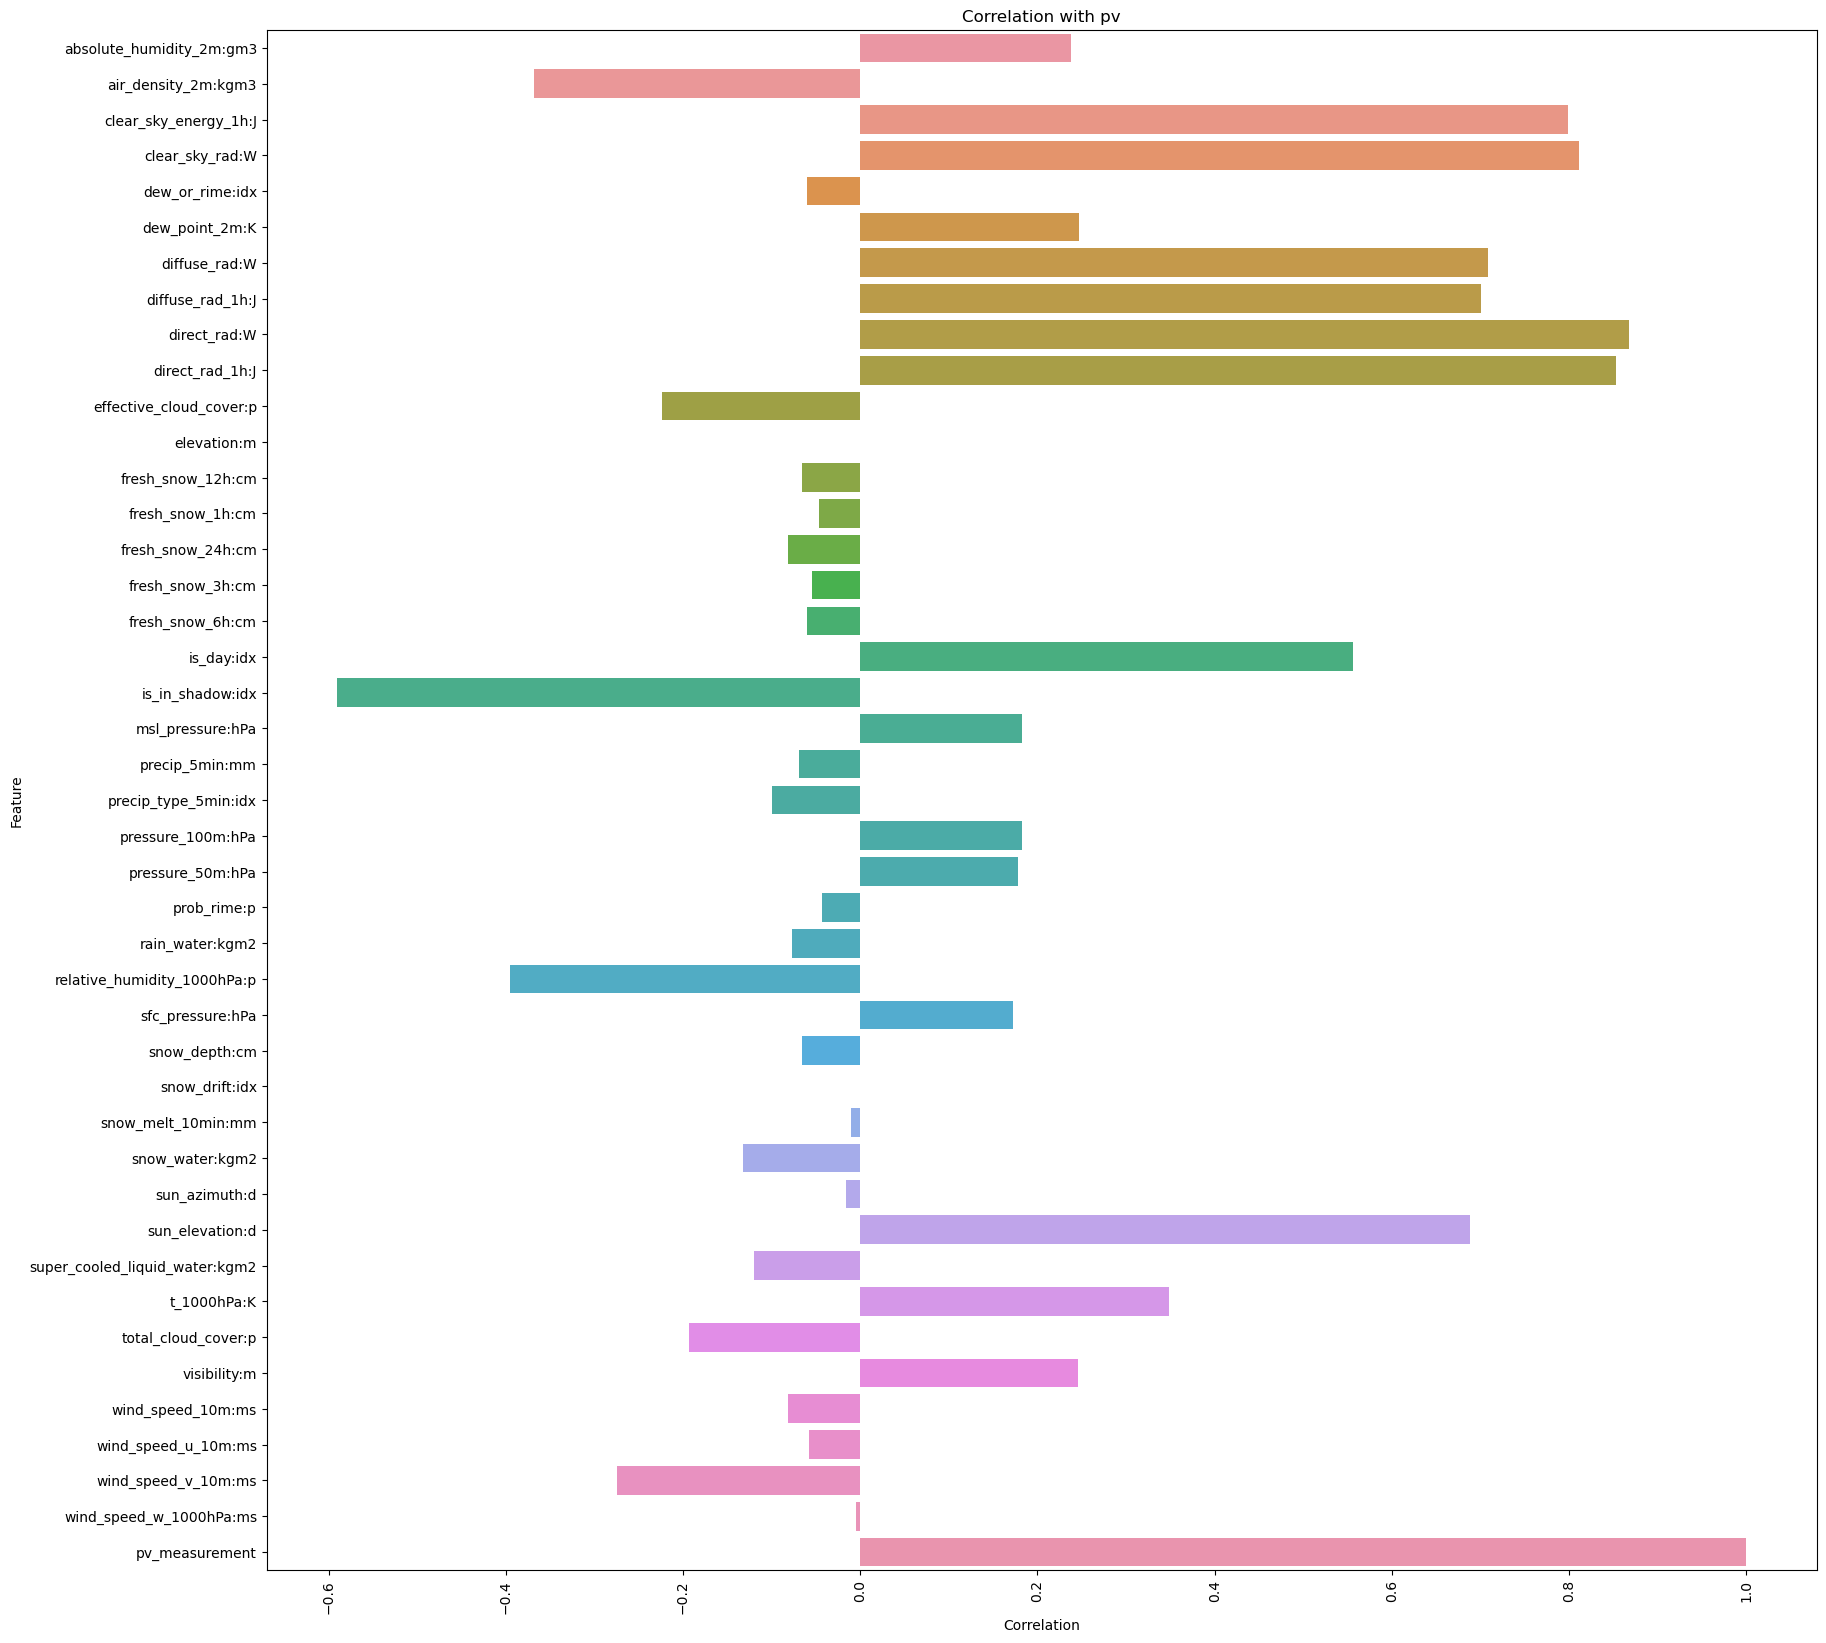

In [149]:


# Crea un dataframe di esempio con numeri nei nomi delle colonne


df = pd.concat([merged_df_train_obs_A, merged_df_train_est_A], ignore_index=True)


# Calcola la matrice di correlazione
correlation_matrix = df.corrwith(df[target])

plt.figure(figsize=(20, 20))
ax = sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index, orient='h')
plt.title('Correlation with pv')
plt.xlabel('Correlation')
plt.ylabel('Feature')

plt.xticks(rotation=90)


plt.show()

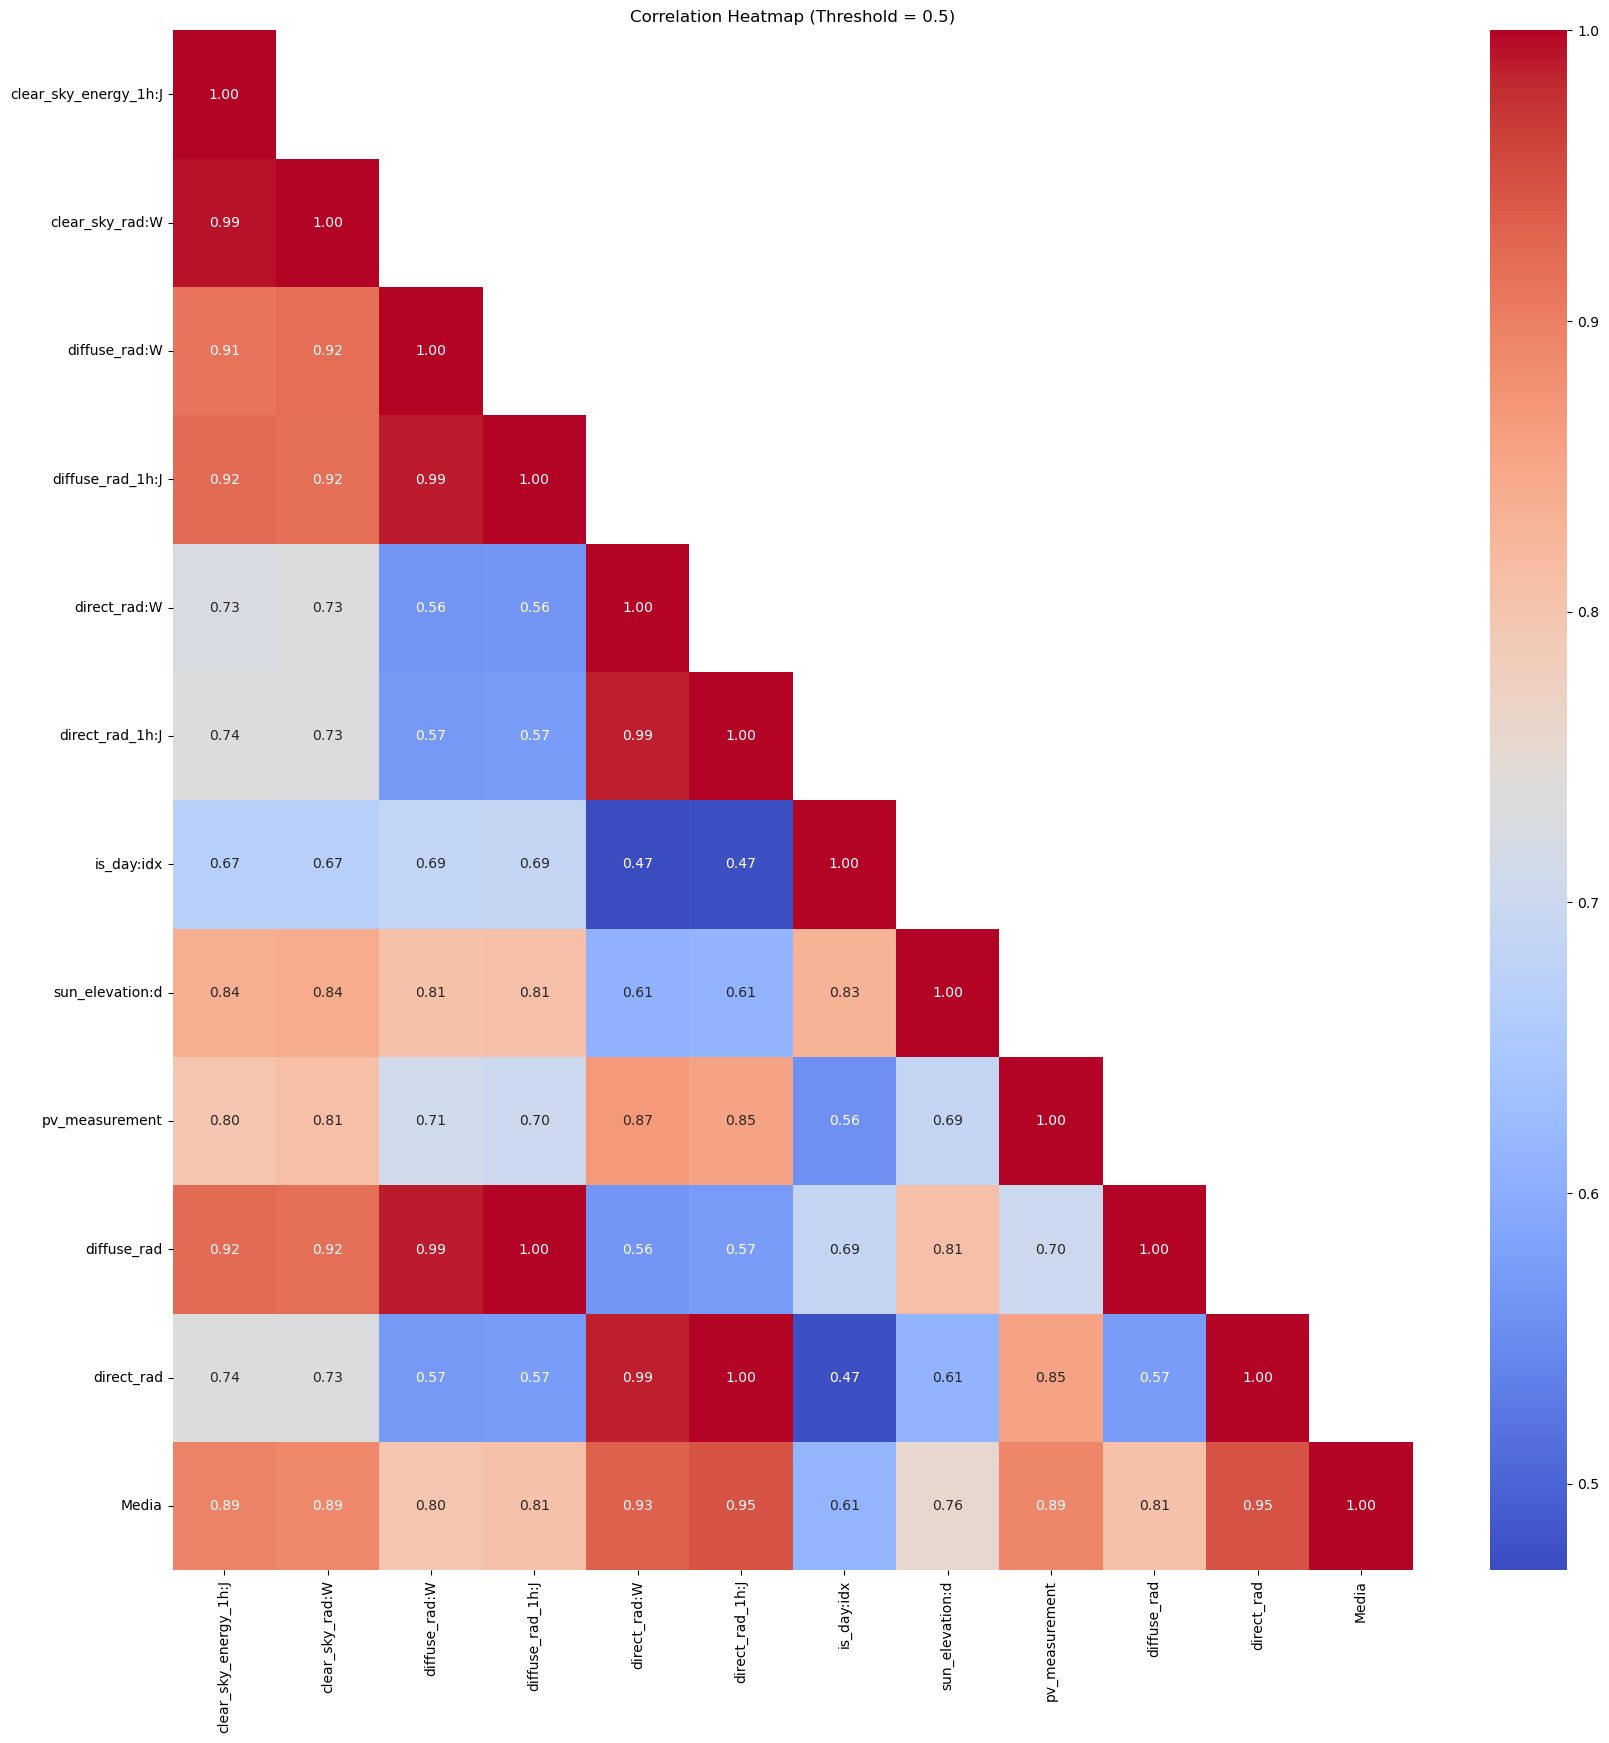

In [191]:

df = pd.concat([merged_df_train_obs_A, merged_df_train_est_A], ignore_index=True)
df['diffuse_rad'] = df['diffuse_rad:W'] + df['diffuse_rad_1h:J']
df['direct_rad'] = df['direct_rad:W'] + df['direct_rad_1h:J']
df['direct_rad'] = df['direct_rad'].astype(float)
df['diffuse_rad'] = df['diffuse_rad'].astype(float)

# Calcola la media tra le due colonne
df['Media'] = (df['direct_rad'] + df['diffuse_rad']) / 2

# Calcola la matrice di correlazione
correlation_matrix = df.corr()

# Definisci la soglia
threshold = 0.5

# Trova le colonne da mantenere
columns_to_keep = correlation_matrix.columns[(correlation_matrix >= threshold).sum() >=7]

# Seleziona solo le colonne che soddisfano il criterio
filtered_corr_matrix = correlation_matrix.loc[columns_to_keep, columns_to_keep]
mask_upper = np.triu(np.ones(filtered_corr_matrix.shape), k=1).astype(bool)

# Crea una heatmap della matrice di correlazione filtrata
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=mask_upper)
plt.title(f'Correlation Heatmap (Threshold = {threshold})')
plt.show()


In [143]:
df = X_train
to_keep_columns = filtered_corr_matrix.drop(columns=['pv_measurement'])
print(to_keep_columns.columns)
df = df[to_keep_columns.columns].to_numpy()

df.shape

Index(['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'diffuse_rad:W',
       'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'is_day:idx',
       'sun_elevation:d'],
      dtype='object')


(26700, 8)

In [144]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Crea un oggetto PCA
pca = PCA(n_components=5)

# Esegui la PCA
x_train_PCA = pca.fit_transform(scaled_data)
x_train_PCA.shape

(26700, 5)

In [145]:
df = X_test

df = df[to_keep_columns.columns].to_numpy()

df.shape

(2967, 8)

In [157]:
scaled_data = scaler.fit_transform(df)

# Crea un oggetto PCA
pca = PCA(n_components=3)

# Esegui la PCA
x_test_PCA = pca.fit_transform(scaled_data)
x_test_PCA

array([[ 1.16526146,  0.48965833, -0.71652789],
       [ 1.24276442,  0.81302804, -0.83616737],
       [ 1.34820135,  1.66989633, -1.44814367],
       ...,
       [ 2.3175298 , -0.69692439, -0.81722597],
       [ 2.41150421, -0.38341569, -1.10340215],
       [ 2.48227004, -0.37185675, -1.09883365]])

In [183]:
pipeline = Pipeline(steps=[('Scaler', Normalizer()), 
                                 ('PCA', PCA(n_components=2)), 
                                 ('Forest', RandomForestRegressor(n_estimators=50, max_depth=5))])

In [184]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
mean_absolute_error(y_test, y_pred)

394.03975699132405

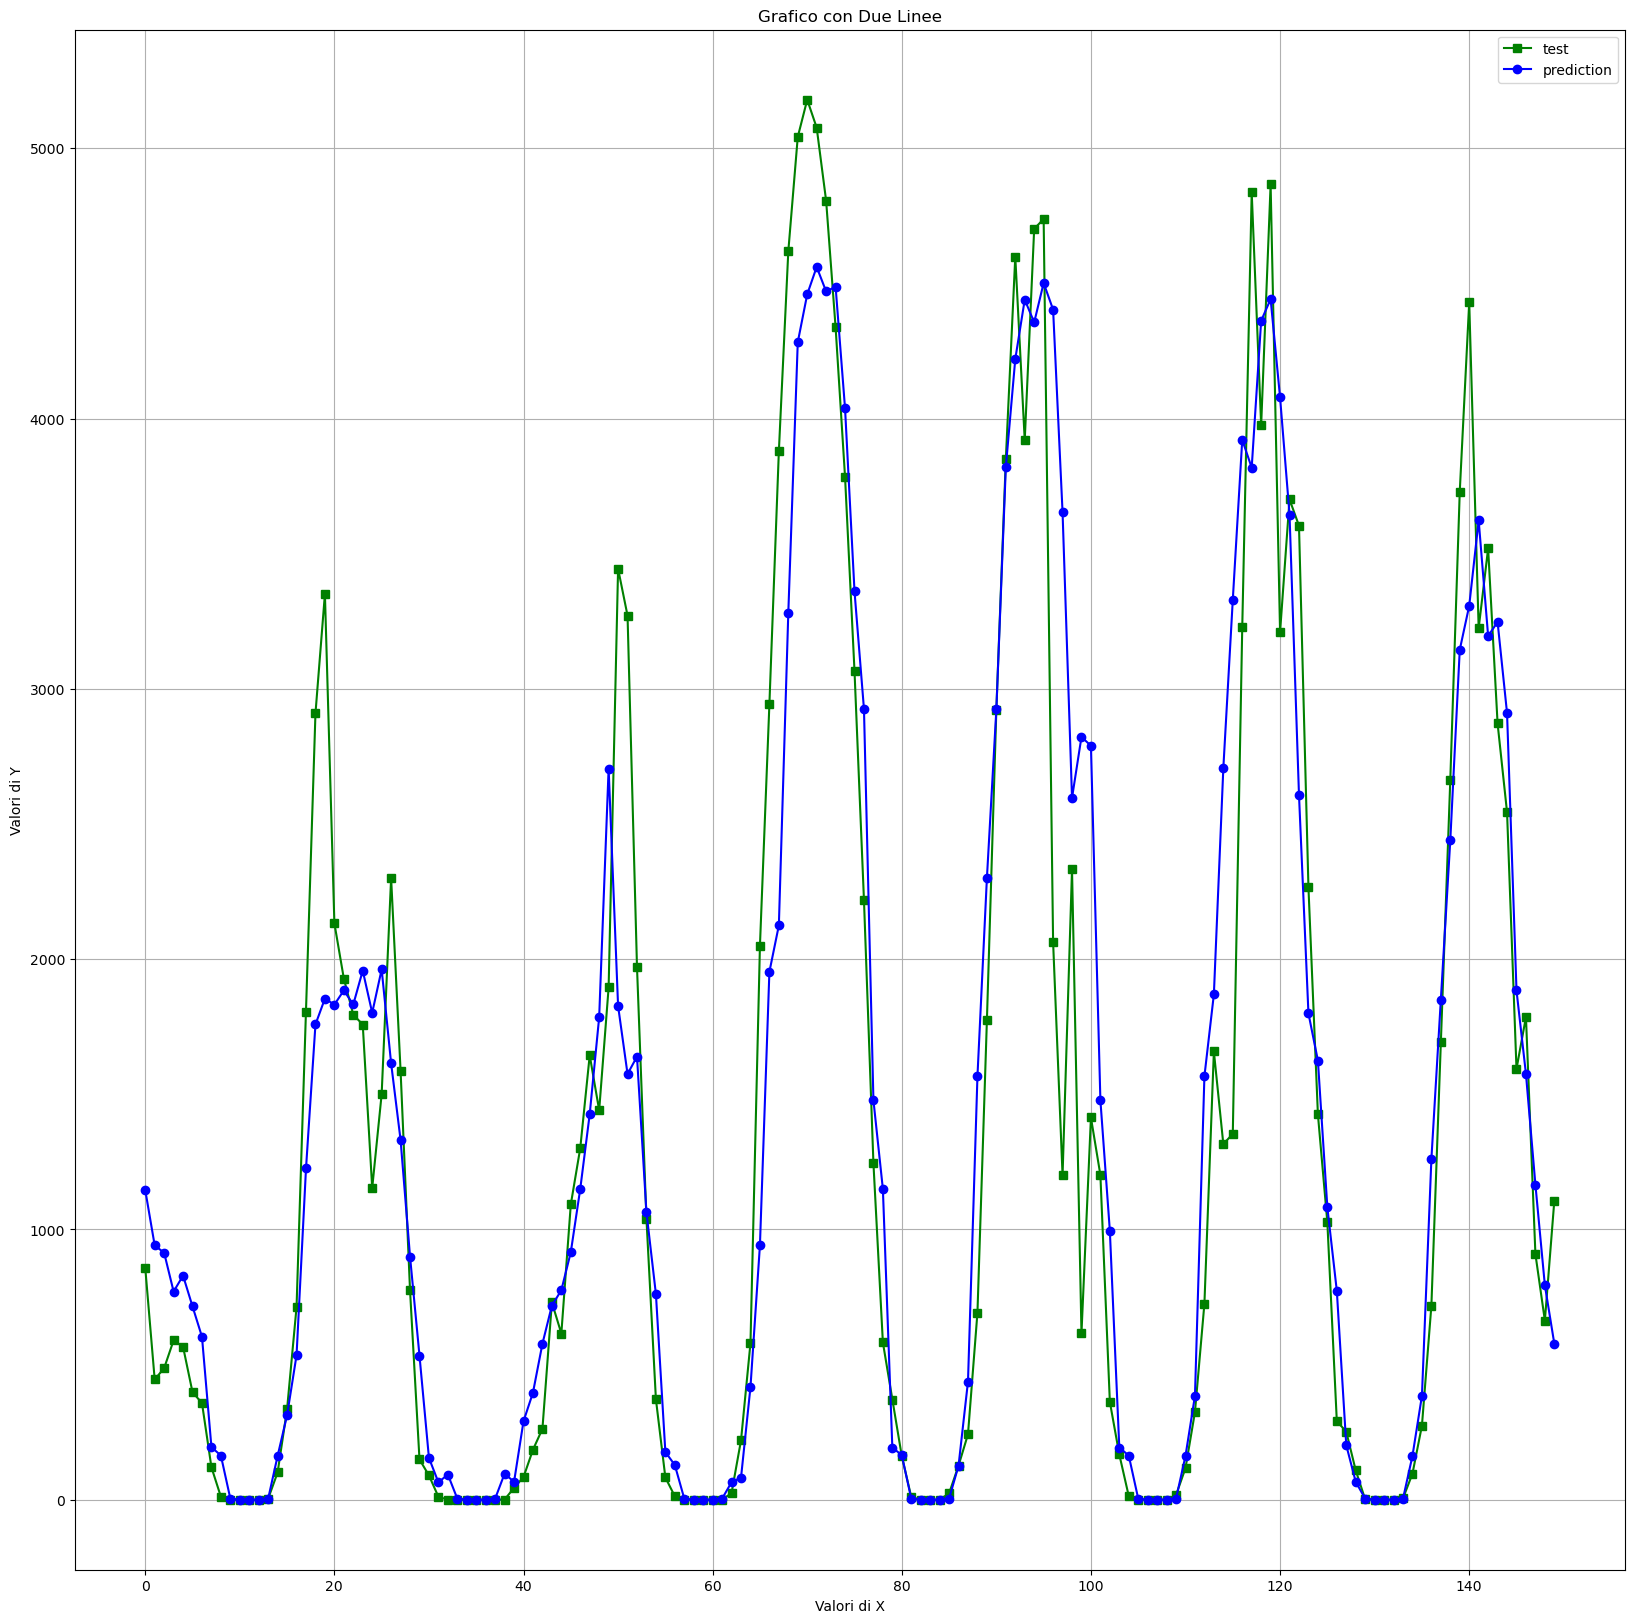

In [182]:
plt.figure(figsize=(20, 20))
plt.plot(y_test[50:200], label='test', color='g', marker='s')
plt.plot(forest_pca_test_predictions[50:200], label='prediction', color='b', marker='o')


# Aggiungi titoli ed etichette
plt.title('Grafico con Due Linee')
plt.xlabel('Valori di X')
plt.ylabel('Valori di Y')

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.grid(True)
plt.show()